In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_file=("Cardiac_Outcomes.xlsx")
all_sheets=pd.read_excel(data_file,sheet_name=None)
#to access sheet by name in excel
Hospital_data=all_sheets['Hospitalization_Discharge']
Cardiac_data=all_sheets['CardiacComplications']
Response_data=all_sheets['Responsivenes']
Patient_data=all_sheets['PatientHistory']
lab_data=all_sheets['Labs']
Demography_data=all_sheets['Demography']
Patientpre_data=all_sheets['Patient_Precriptions']
print(data_file)

Cardiac_Outcomes.xlsx


# Q1 find the 5 patients of counts has maximum number of NYHA_cardiac_function_classification

In [2]:
import pandas as pd
response3= pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='CardiacComplications')
patient_counts=response3.groupby('inpatient_number')['NYHA_cardiac_function_classification'].value_counts()
patient_counts = patient_counts.reset_index(name='count')

# Sort the counts in descending order
sorted_counts = patient_counts.sort_values(by='count', ascending=False)

# Get the top 5 patients
top_5_patients = sorted_counts.head(5)

print("Top 5 patients with the maximum number of NYHA cardiac function classifications:")
print(top_5_patients)


Top 5 patients with the maximum number of NYHA cardiac function classifications:
      inpatient_number  NYHA_cardiac_function_classification  count
0               722128                                     4      1
1334            817574                                     4      1
1347            817964                                     2      1
1346            817948                                     4      1
1345            817939                                     3      1


# Q2Display total count of patients in each admission ward based gender and their weight adove 50

In [4]:
import pandas as pd

response2= pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Hospitalization_Discharge')
response4=pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Demography')
data=response2[['admission_ward']]
data_gender=response4[response4['weight']>50]['gender']
df = pd.concat([data,data_gender], axis=1)
patient_counts = df.groupby(['admission_ward', 'gender']).size()
print(patient_counts)
print(sum(patient_counts))


admission_ward  gender
Cardiology      Female    312
                Male      384
GeneralWard     Female     46
                Male       72
ICU             Female      3
                Male        5
Others          Female     39
                Male       44
dtype: int64
905


# Q3find the patients with maxium white_blood_cell count and red blood cell count using sorting technique.

In [5]:
import pandas as pd
response4= pd.read_excel('Cardiac_Outcomes.xlsx', sheet_name='Labs')
y=response4.sort_values(by=['white_blood_cell'])['inpatient_number']
y_1=response4.sort_values(by='red_blood_cell')['inpatient_number']

print("patient with max white_blood_cell ",y.head(1))
print("patient with max red_blood_cell ", y_1.head(1))


patient with max white_blood_cell  865    746068
Name: inpatient_number, dtype: int64
patient with max red_blood_cell  1732    774352
Name: inpatient_number, dtype: int64


# Q4 tachypnea and bradypnea patients count?

In [14]:
data_file=("Cardiac_Outcomes.xlsx")
all_sheets=pd.read_excel(data_file,sheet_name=None)
#to access sheet by name in excel


lab_data=all_sheets['Labs']


Tachpnea = (lab_data['respiration']>20).sum()
print('Tachpnea Patients Count:',Tachpnea)
Bradypnea = (lab_data['respiration']<12).sum()
print('Bradypnea Patients Count:',Bradypnea)

Tachpnea Patients Count: 240
Bradypnea Patients Count: 1


# Q5  Dementia Male patients count? Average age for Dementia Male paient?

In [15]:
data_file=("Cardiac_Outcomes.xlsx")
all_sheets=pd.read_excel(data_file,sheet_name=None)
#to access sheet by name in excel

Demography_data=all_sheets['Demography']


def Random_Age(age):
 return pd.Series(age.split("-", 1))
Demography_data[['Age1', 'Age2']] = Demography_data['ageCat'].apply(Random_Age)  
Demography_data['Age'] = [np.random.randint(s, e) for s,e in zip(Demography_data['Age1'], Demography_data['Age2'])]
del Demography_data['Age1']
del Demography_data['Age2']
merged=pd.merge(Patient_data, Demography_data , on='inpatient_number')
Dementia_Male= ((merged['dementia']==1) & (merged['gender']=='Male')).sum()
print("Dementia male patients",Dementia_Male)
Male_count=merged[merged['gender']=='Male']
Average=Male_count['Age'].mean()
print('average age for Dementia male patient:',round(Average))

Dementia male patients 64
average age for Dementia male patient: 72


# Q6 percentage of patients in cardiology to home?

In [16]:
data_file=("Cardiac_Outcomes.xlsx")
all_sheets=pd.read_excel(data_file,sheet_name=None)
#to access sheet by name in excel
Hospital_data=all_sheets['Hospitalization_Discharge']

Cardiology_Patients= (Hospital_data['admission_ward']=='Cardiology').sum()
Cardiology_Home = ((Hospital_data['DestinationDischarge']=='Home') & (Hospital_data['admission_ward']=='Cardiology' )).sum()
Percentage=Cardiology_Home/Cardiology_Patients*100
print('Percentage of Cardiology patients returned to home:',round(Percentage,2),'%')

Percentage of Cardiology patients returned to home: 71.17 %


# Q7 what is the ratio between Thrombocytopenia Patients and Thrombocytosis Patients?

In [27]:
Thrombocytopenia=(lab_data['platelet']<150).sum()
Thrombocytosis=(lab_data['platelet']>450).sum()
ratio=Thrombocytopenia/Thrombocytosis
print('ratio between Thrombocytopenia and Thrombocytosis Patients:',round(ratio))

ratio between Thrombocytopenia and Thrombocytosis Patients: 170


# Q8 Find count of Liver Disease Patients with Hypofibrinogenemia and Liver Disease Patients with 'Hyperfibrinogenemia?

In [18]:
data_file=("Cardiac_Outcomes.xlsx")
all_sheets=pd.read_excel(data_file,sheet_name=None)
#to access sheet by name in excel

Patient_data=all_sheets['PatientHistory']

merged=pd.merge(Patient_data, lab_data , on='inpatient_number')
Liver_Patients=(merged['liver_disease']==1).sum()
print('liver patients ',Liver_Patients)
liver_Hyperfibrinogemia=((merged['liver_disease']==1) & (merged['fibrinogen']>4)).sum()
print('liver patients with Hyperfibrinogemia ',liver_Hyperfibrinogemia)
liver_Hypofibrinogemia=((merged['liver_disease']==1) & (merged['fibrinogen']<1)).sum()
print('liver patients with Hypofibrinogemia ',liver_Hypofibrinogemia)

liver patients  84
liver patients with Hyperfibrinogemia  8
liver patients with Hypofibrinogemia  2


# Q9 Create BarChart with Gender and Diabetes?

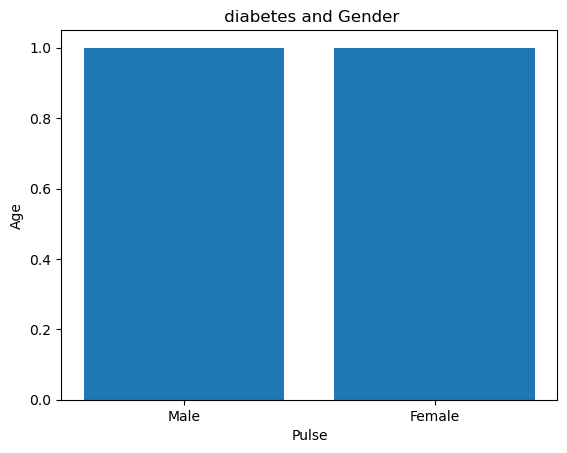

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
data_file=("Cardiac_Outcomes.xlsx")
all_sheets=pd.read_excel(data_file,sheet_name=None)
#to access sheet by name in excel

Patient_data=all_sheets['PatientHistory']

merged=pd.merge(Patient_data,Demography_data, on='inpatient_number')
#concated=pd.concat([lab_data,Demography_data],axis=1)
bars = plt.bar(merged['gender'],merged ['diabetes'])
#sns.violinplot(x='gender',y='pulse',data=merged)
plt.xlabel("Pulse")
plt.ylabel("Age")
plt.title(" diabetes and Gender")
plt.show()


# Q10  Find the Correlation between Pulse and Temperature?

In [21]:
data_file=("Cardiac_Outcomes.xlsx")
all_sheets=pd.read_excel(data_file,sheet_name=None)
#to access sheet by name in excel
lab_data=all_sheets['Labs']

correlation =lab_data['pulse'].corr(lab_data['body_temperature'])
print('Correlation Between Pulse and Temprature',round(correlation,2))

Correlation Between Pulse and Temprature 0.09


# Q11 Extra Questiions 1 a How hypertension is leading to cardiac problems and the out comne ( 130/90 )


outcome_during_hospitalization
Alive                    246
DischargeAgainstOrder      7
dtype: int64


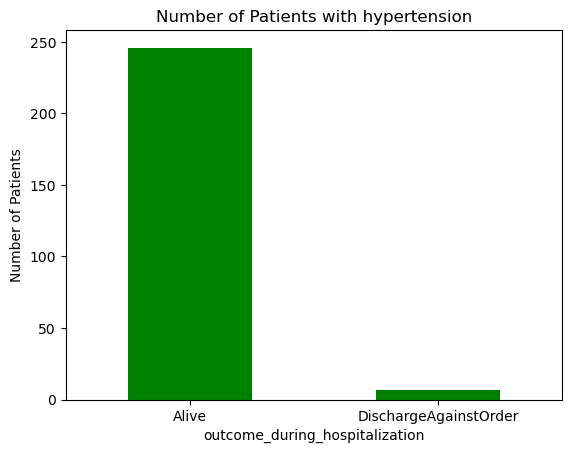

In [22]:
import matplotlib.pyplot as plt

hypertension =lab_data[(lab_data['systolic_blood_pressure'] > 130)  & (lab_data['diastolic_blood_pressure'] > 90)]

hyper=pd.merge( Hospital_data,hypertension,on='inpatient_number')

hyper_cnt =hyper.groupby(hyper['outcome_during_hospitalization']).size()


hyper_cnt.plot(kind='bar', stacked=True,color='green')
plt.xlabel('outcome_during_hospitalization')
plt.ylabel('Number of Patients')
plt.title('Number of Patients with hypertension')
plt.xticks(rotation=0)
#plt.legend(title='Age Category')
plt.show


print(hyper_cnt)

# Q12  Using cross tab function, find patient more prone to obesity?

In [23]:
data_file = 'Cardiac_Outcomes.xlsx'
all_sheets = pd.read_excel(data_file, sheet_name=None)
Demography = all_sheets['Demography']
pivot_table=pd.crosstab(index=Demography.inpatient_number, columns=Demography.ageCat,values=Demography.BMI,aggfunc='max')
pivot_table['max_BMI'] = pivot_table.max(axis=1)
pivot_table
most_obese_inpatient = pivot_table['max_BMI'].idxmax()

most_obese_inpatient
Demography_data[Demography_data['inpatient_number']==most_obese_inpatient]

,inpatient_number,gender,weight,height,BMI,occupation,ageCat,Age
319,815731,Male,49.5,0.35,404.081633,farmer,49-59,51


# Q13 To find the outlier, create a scatter plot using body against each patient

<function matplotlib.pyplot.show(close=None, block=None)>

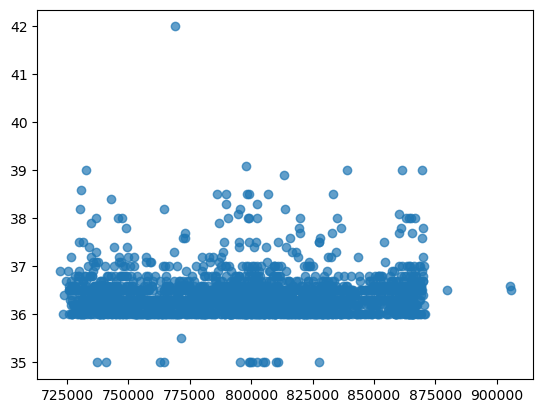

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data_file = 'Cardiac_Outcomes.xlsx'
all_sheets = pd.read_excel(data_file, sheet_name=None)
Labs = all_sheets['Labs']
x=Labs['inpatient_number']
y=Labs['body_temperature']

Result=plt.scatter(x, y, alpha=0.7)

plt.show

# Q14  Percentage of Female Farmers?

In [28]:
female_farmers = ((Demography_data['occupation']=='farmer') & (Demography_data['gender']=='Female')).sum()
Total_Farmers=(Demography_data['occupation']=='farmer').sum()
Percentage=female_farmers/Total_Farmers*100
print('Female Farmers Percentage:',round(Percentage),'%')

Female Farmers Percentage: 57 %


# Q15 Visualization of the cardiac attacks based on age category.

ageCat
21-29       4
29-39      12
39-49      56
49-59     106
59-69     368
69-79     715
79-89     646
89-110    101
dtype: int64


<Axes: xlabel='ageCat'>

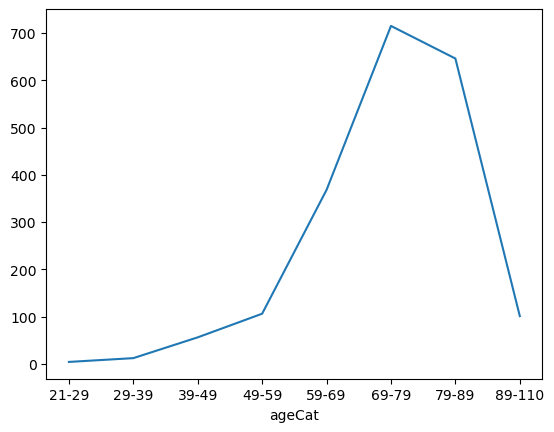

In [29]:
import seaborn as sns

demo_hospital_data=pd.merge( Hospital_data,Demography_data,on='inpatient_number')

grouped_data=demo_hospital_data.groupby('ageCat').size()
print(grouped_data)
grouped_data.plot()

# Q16 1) Create a Point Plot on Age and Dementia?

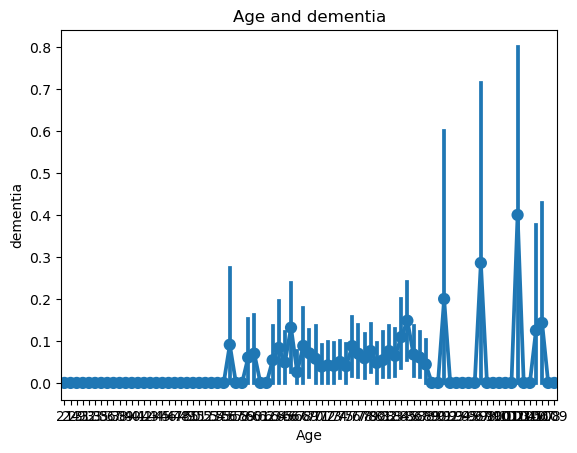

In [30]:
def Random_Age(age):
 return pd.Series(age.split("-", 1))
Demography_data[['Age1', 'Age2']] = Demography_data['ageCat'].apply(Random_Age)  
Demography_data['Age'] = [np.random.randint(s, e) for s,e in zip(Demography_data['Age1'], Demography_data['Age2'])]
merged=pd.merge(lab_data,Demography_data, on='inpatient_number')
merged=pd.merge(Patient_data, Demography_data , on='inpatient_number')
sns.pointplot(x='Age',y='dementia',data=merged)
plt.xlabel('Age')
plt.ylabel('dementia')
plt.title('Age and dementia')
plt.show()

 # Q17  Find Mortality severity patients count?


In [31]:
 
Mortality_Patients = (Patient_data['CCI_score']>=5).sum()
print('Mortality Severity Patients',Mortality_Patients)

Mortality Severity Patients 16
